#LSI and PCA on Big Data Companies & Students in CS249

# Big Data Companies

In [9]:
%load_ext rpy2.ipython

In [77]:
%%R

# Companies x Buzzwords

BigData100 = read.csv("BigData100.csv", header=TRUE)

n = dim(BigData100)[1]
p = dim(BigData100)[2]

Buzzwords = colnames(BigData100)[2:p]
Companies = BigData100[,1]

IncidenceMatrix = data.matrix(BigData100[,2:p])
rownames(IncidenceMatrix) = BigData100[,1]

cat("\nsize of incidence matrix (= number of companies x number of buzzwords):\n")
print(dim(IncidenceMatrix))

cat("\nupper-left corner of incidence matrix\n")
print(IncidenceMatrix[ 1:10, 1:6 ])



size of incidence matrix (= number of companies x number of buzzwords):
[1] 106  41

upper-left corner of incidence matrix
             Ad...Media.Apps Analytics.Infrastructure
1010data                   0                        0
10gen                      0                        0
Aerospike                  0                        0
AgilOne                    0                        0
Alteryx                    0                        0
Apache Hbase               0                        0
Atigeo                     0                        0
Attivio                    0                        0
Autonomy                   0                        0
Ayata                      0                        0
             Analytics.and.Visualization Business.Intelligence
1010data                               1                     0
10gen                                  0                     0
Aerospike                              0                     0
AgilOne                       

## Compute the SVD of the Incidence Matrix

In [79]:
%%R

s = svd(IncidenceMatrix);
sigma = s$d
U = s$u
V = s$v
S = diag(sigma)

US = U %*% S    # scale each singular vector in U by its singular value in S
VS = V %*% S    # scale each singular vector in V by its singular value in S' = S

rownames(US) = rownames(IncidenceMatrix)
rownames(VS) = colnames(IncidenceMatrix)

u1 = US[,1];  u2 = US[,2];  U12 = US[,1:2]  # axes for Companies
v1 = VS[,1];  v2 = VS[,2];  V12 = VS[,1:2]  # axes for Buzzwords

cat("\naxes for Companies\n")
print(cbind( u1, u2 ))

cat("\naxes for Buzzwords\n")
print(cbind( v1, v2 ))


axes for Companies
                             u1           u2
1010data            -0.81170333 -1.111510354
10gen               -1.51880968  0.671091219
Aerospike           -1.14309882  0.515721728
AgilOne             -0.63964621  0.184295357
Alteryx             -0.43599247 -1.266879846
Apache Hbase        -0.45939086  0.035935370
Atigeo              -0.35599252  0.034325841
Attivio             -0.20226652 -0.061982930
Autonomy            -0.20226652 -0.061982930
Ayata               -0.43599247 -1.266879846
Bime                -0.68779278 -0.537717585
Birst               -0.44950766  0.125286518
Bloom Reach         -0.32965367 -0.181384838
Blue Fin Labs       -0.44156589 -0.276788245
BlueKai             -0.30375094 -0.122610752
Business Objects    -0.07379680 -0.030082973
Calpont             -1.17825080  0.554826133
Cassandra           -1.59115173  0.635610521
Centrifuge          -0.43599247 -1.266879846
Cetas               -1.12702155 -1.134855202
Chart. io           -0.31208193 -0.

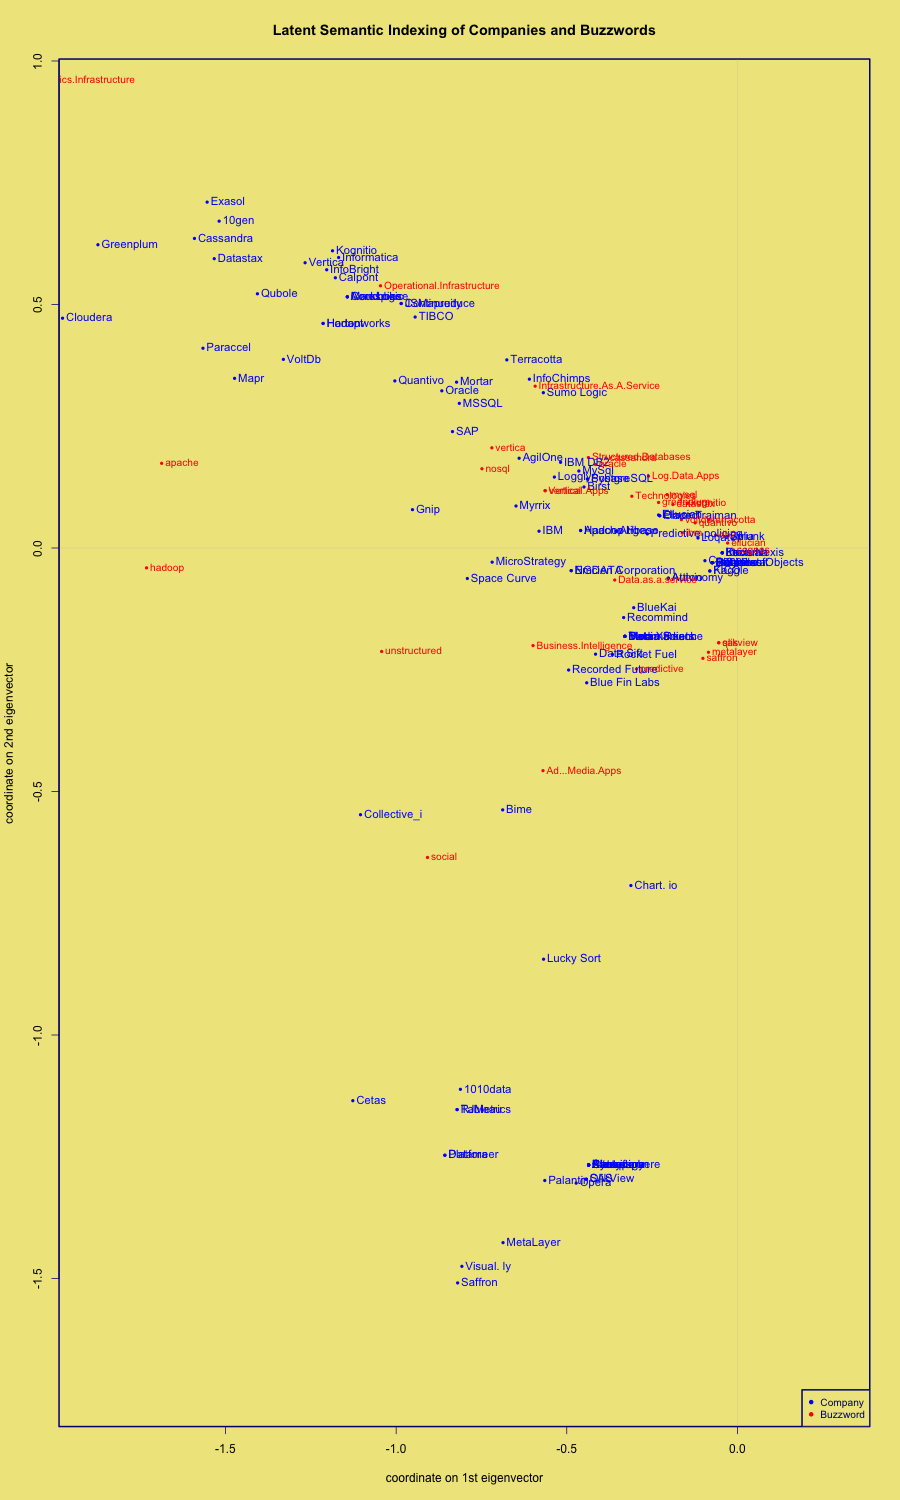

In [45]:
%%R -h 1500 -w 900

xrange = range(c(u1, v1))
yrange = range(c(u2, v2))
xrange = c(-1.9, 0.3)
yrange = c(-1.7, 0.9)

opar = par( lwd=2, bg="khaki", fg="navy" )

# plot the 2D projection of the data

plot(   c(), c(), type="n", xlim=xrange, ylim=yrange,
                xlab = "coordinate on 1st eigenvector", ylab = "coordinate on 2nd eigenvector",
                main = "Latent Semantic Indexing of Companies and Buzzwords" )
abline( h=0, col="gray", lwd=0.3 )  # add x-axis line
abline( v=0, col="gray", lwd=0.3 )  # add y-axis line
points( u1, u2, pch=20, cex=0.5, col="blue" )
points( v1, v2, pch=20, cex=0.5, col="red" )

# zeroes = rep(0,p)
# arrows( zeroes, zeroes, v1, v2, col="red", angle=5, length=0.2)

text(   u1, u2, Companies, col="blue", pos=4, offset=0.25, cex=0.95 )
text(   v1, v2, Buzzwords, col="red",  pos=4, offset=0.25, cex=0.85 )

text( 1.25, seq(-0.8,-1.9, length=length(Buzzwords)), Buzzwords, col="red", pos=4, cex=0.75 )

legend( "bottomright", c("Company", "Buzzword"), cex=0.85, col=c("blue","red"), pch=c(20,20), bg="khaki" )

par(opar)

In [ ]:
%%R -w 900 -h 1200


VendorRevenue = read.csv("BigDataRevenue.csv", header=TRUE, row.names = 1 ) ##  treat column 1 as row names in the result
n = dim(VendorRevenue)[1]
p = dim(VendorRevenue)[2]

Data = data.matrix( cbind( VendorRevenue[,3:p]/100.0 ) )
colnames(Data) = colnames(VendorRevenue)[3:p]

VRsvd = svd(Data)

U = VRsvd$u
V = VRsvd$v
D = diag(VRsvd$d)


Metrics = gsub(" ","\n", gsub("X", "", gsub("."," ", colnames(Data), fixed=TRUE), fixed=TRUE))
Vendors = gsub(" ","\n", rownames(Data))


IncidenceMatrix = data.matrix(Data)

s = svd(IncidenceMatrix);
sigma = s$d
U = s$u
V = s$v
S = diag(sigma)

u1 = U[,1];  u2 = U[,2];  U12 = U[,1:2]  # axes for Vendors
v1 = V[,1];  v2 = V[,2];  V12 = V[,1:2]  # axes for Metrics

v1 = v1 * sqrt(p/n)  # rescaling since U and V have different lengths
v2 = v2 * sqrt(p/n)  # rescaling since U and V have different lengths

xrange = range(c(u1, v1)) * 1.1
yrange = range(c(u2, v2)) * 1.1
# xrange = c(-0.20, 0.02)
# yrange = c(-0.25, 0.15)

par( lwd=2, bg="khaki", fg="navy" )

# plot the 2D projection of the data

plot(   c(), c(), type="n", xlim=xrange, ylim=yrange,
                xlab = "coordinate on 1st eigenvector", ylab = "coordinate on 2nd eigenvector",
                main = "Latent Semantic Indexing of Vendors and Metrics" )

abline( h=0, col="gray", lwd=0.3 )  # add x-axis line
abline( v=0, col="gray", lwd=0.3 )  # add y-axis line

points( u1, u2, pch=20, cex=0.5, col="blue" )
points( v1, v2, pch=20, cex=0.5, col="red" )

zeroes = rep(0,p)
arrows( zeroes, zeroes, v1, v2, col="red", angle=5, length=0.2)

text(   u1, u2, Vendors, col="blue", pos=4, offset=0.25, cex=0.85 )
text(   v1, v2, Metrics, col="red",  pos=2, offset=0.25, cex=0.85 )

legend( "topright", c("Vendor", "Metric"), cex=0.85, col=c("blue","red"), pch=c(20,20), bg="khaki" )

first 3 left eigenvectors:
                                 [,1]   [,2]   [,3]
 IBM                           -0.057 -0.083  0.126
 HP                            -0.050 -0.083  0.145
 Teradata                      -0.067 -0.070  0.111
 Dell                          -0.019 -0.106  0.188
 Oracle                        -0.055 -0.077  0.137
 SAP                           -0.068 -0.001  0.171
 EMC                           -0.055 -0.070  0.140
 Cisco Systems                 -0.020 -0.111  0.181
 Microsoft                     -0.066 -0.004  0.174
 Accenture                     -0.080 -0.231 -0.038
 Fusion-io                     -0.069 -0.071  0.090
 PwC                           -0.080 -0.231 -0.038
 SAS Institute                 -0.074 -0.024  0.139
 Splunk                        -0.163  0.136  0.031
 Deloitte                      -0.080 -0.231 -0.038
 Amazon                        -0.079 -0.233 -0.037
 NetApp                        -0.025 -0.113  0.170
 Hitachi                       -0.079

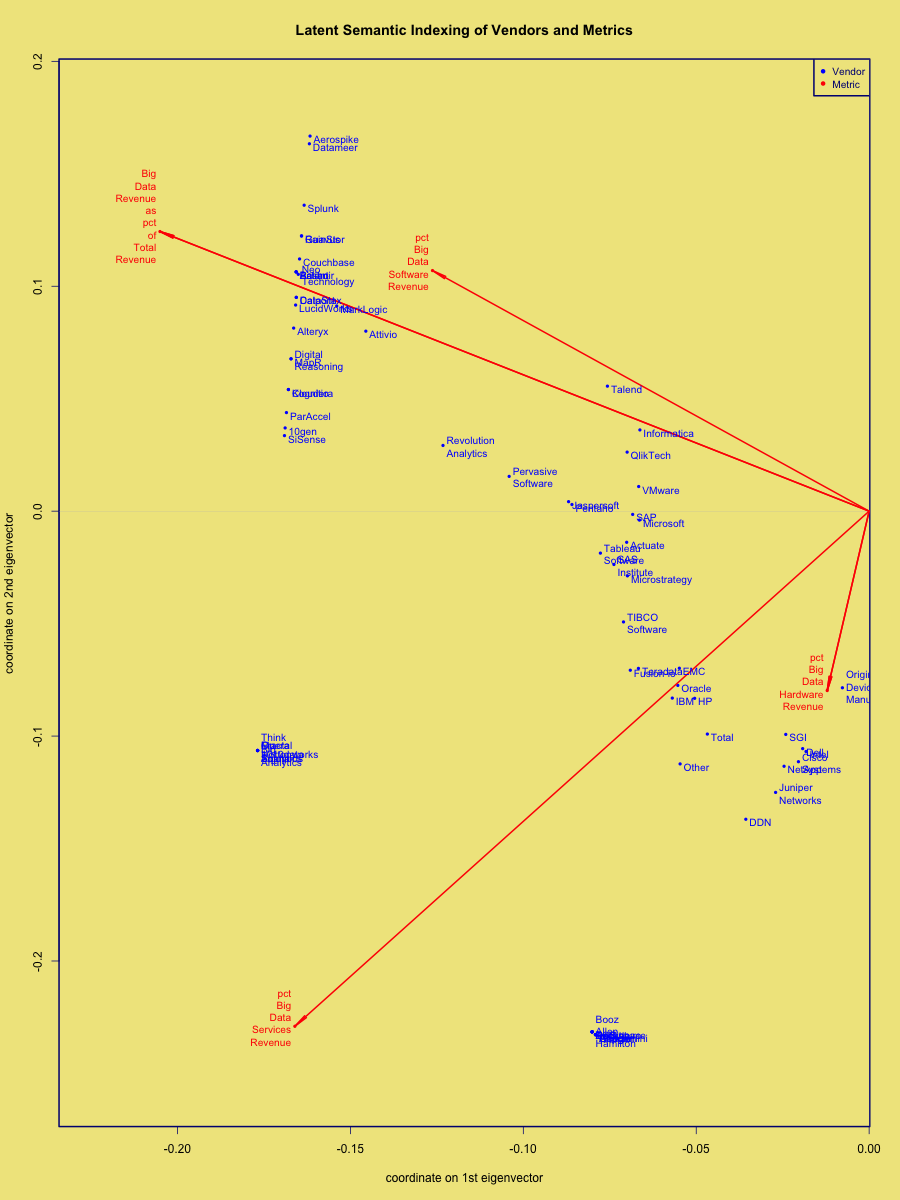

In [76]:
Ueigenvectors = U[,1:3]
rownames(Ueigenvectors) = rownames(Data)
cat("first 3 left eigenvectors:\n")
print(round( Ueigenvectors, 3))

#CS249 Students

In [89]:
%%R -w 900 -h 900

T = read.csv("CS249Students.csv", header=TRUE)

Data = data.matrix(T[, 5:12])

n = nrow(Data)
p = ncol(Data)

rownames(Data) = T[,2]  #  name each row by the first name of the student

print( head(Data) )


           MS_or_PhD CS_MAJOR EE_MAJOR STAT_MAJOR ASIA INDIA ELSEWHERE GENDER
DEEPAK            -1        1        0          0    0     1         0     -1
PUNEET            -1        1        0          0    0     1         0     -1
SAMUEL-WON        -1        1        0          0    1     0         0     -1
ARCHANA           -1        1        0          0    0     1         0      1
DAKSHA            -1        1        0          0    0     1         0      1
BHARGAV           -1        0        1          0    0     1         0     -1


## LSI on CS249 Students

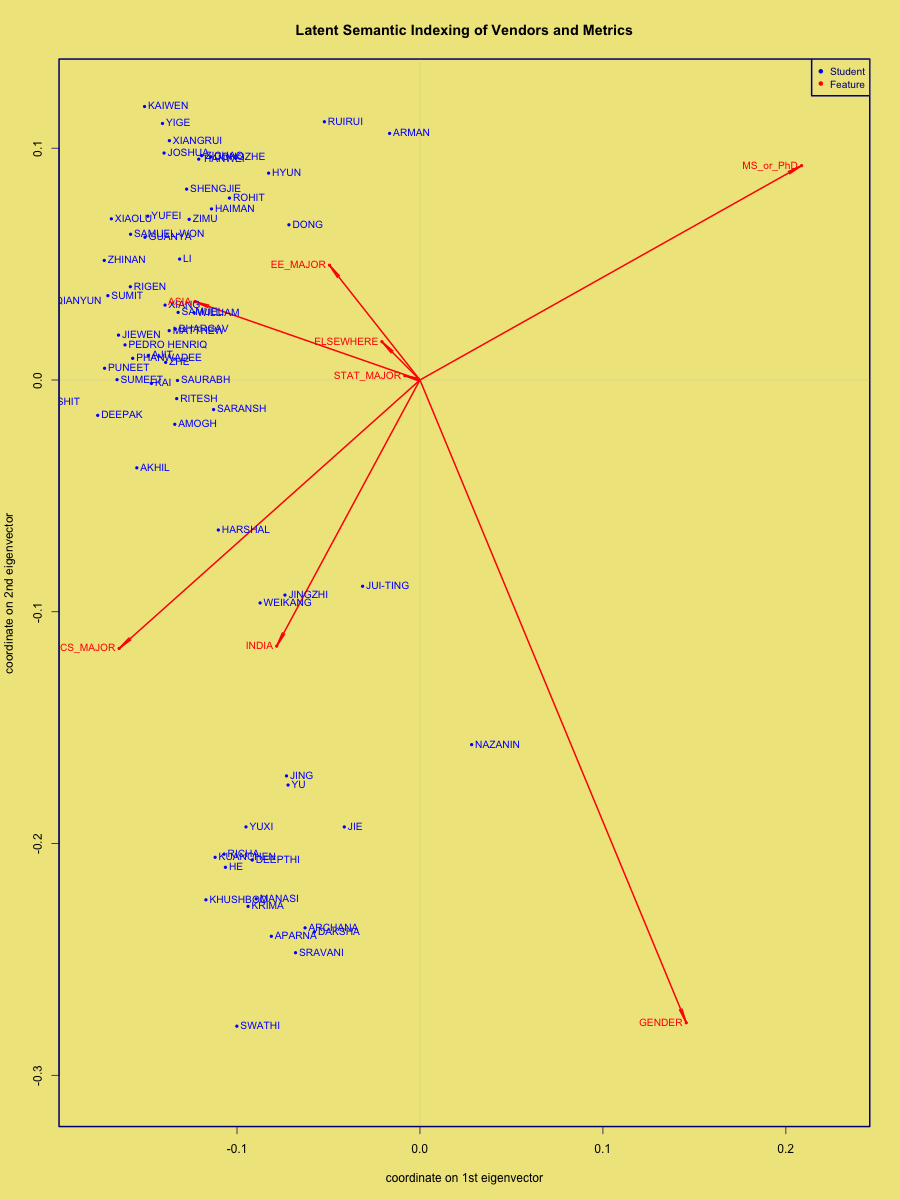

In [90]:
%%R -w 900 -h 1200

VRsvd = svd(Data)

U = VRsvd$u
V = VRsvd$v
D = diag(VRsvd$d)

Features = colnames(Data)
Students = rownames(Data)

IncidenceMatrix = data.matrix(Data)

s = svd(IncidenceMatrix);
sigma = s$d
U = s$u
V = s$v
S = diag(sigma)

rownames(U) = rownames(Data)
rownames(V) = colnames(Data)

u1 = U[,1];  u2 = U[,2];  U12 = U[,1:2]  # axes for Students
v1 = V[,1];  v2 = V[,2];  V12 = V[,1:2]  # axes for Features

v1 = v1 * sqrt(p/n)  # rescaling since U and V have different lengths
v2 = v2 * sqrt(p/n)  # rescaling since U and V have different lengths

xrange = range(c(u1, v1)) * 1.1
yrange = range(c(u2, v2)) * 1.1
# xrange = c(-0.20, 0.02)
# yrange = c(-0.25, 0.15)

par( lwd=2, bg="khaki", fg="navy" )

# plot the 2D projection of the data

plot(   c(), c(), type="n", xlim=xrange, ylim=yrange,
                xlab = "coordinate on 1st eigenvector", ylab = "coordinate on 2nd eigenvector",
                main = "Latent Semantic Indexing of Vendors and Metrics" )

abline( h=0, col="gray", lwd=0.3 )  # add x-axis line
abline( v=0, col="gray", lwd=0.3 )  # add y-axis line

jittered_u1 = u1 + rnorm(n)*0.025
jittered_u2 = u2 + rnorm(n)*0.025

points( jittered_u1, jittered_u2, pch=20, cex=0.5, col="blue" )
points( v1, v2, pch=20, cex=0.5, col="red" )

zeroes = rep(0,p)
arrows( zeroes, zeroes, v1, v2, col="red", angle=5, length=0.2)

text(   jittered_u1, jittered_u2, Students, col="blue", pos=4, offset=0.25, cex=0.85 )
text(   v1, v2, Features, col="red",  pos=2, offset=0.25, cex=0.85 )

legend( "topright", c("Student", "Feature"), cex=0.85, col=c("blue","red"), pch=c(20,20), bg="khaki" )

In [91]:
%%R

Ueigenvectors = U[,1:3]
rownames(Ueigenvectors) = rownames(Data)
cat("first 3 left eigenvectors:\n")
print(round( Ueigenvectors, 3))

first 3 left eigenvectors:
               [,1]   [,2]   [,3]
DEEPAK       -0.147 -0.018 -0.148
PUNEET       -0.147 -0.018 -0.148
SAMUEL-WON   -0.158  0.039  0.023
ARCHANA      -0.076 -0.230 -0.025
DAKSHA       -0.076 -0.230 -0.025
BHARGAV      -0.119  0.046 -0.019
SHENGJIE     -0.130  0.103  0.152
PEDRO HENRIQ -0.133  0.033 -0.110
MUHAO        -0.030  0.104 -0.213
YUXI         -0.087 -0.173  0.146
AKSHIT       -0.147 -0.018 -0.148
HARSHAL      -0.147 -0.018 -0.148
MANASI       -0.076 -0.230 -0.025
HAIMAN       -0.130  0.103  0.152
WEIKANG      -0.048 -0.128  0.230
NAZANIN       0.028 -0.159 -0.128
SUMIT        -0.158  0.039  0.023
ZHINAN       -0.158  0.039  0.023
SARANSH      -0.147 -0.018 -0.148
YUCHEN       -0.055  0.110 -0.080
ZICHAO       -0.130  0.103  0.152
JUI-TING      0.016 -0.102  0.043
SRAVANI      -0.076 -0.230 -0.025
HYUN         -0.055  0.110 -0.080
DONGZHE      -0.130  0.103  0.152
RUIRUI       -0.055  0.110 -0.080
YIGE         -0.130  0.103  0.152
ZIMU         -0.130  

## PCA on CS249 Students (for comparison)

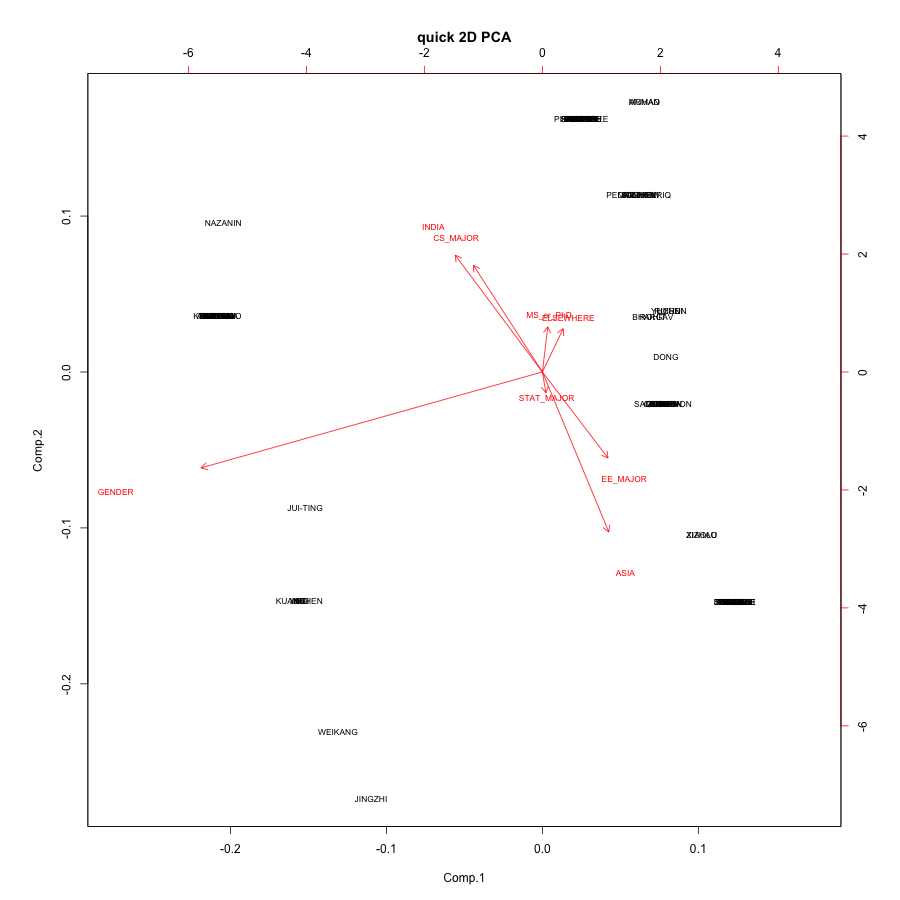

In [100]:
%%R -w 900 -h 900

biplot(princomp(Data), cex=0.7, main="quick 2D PCA", cor=TRUE)

In [93]:
%%R

print(summary(Data))

   MS_or_PhD          CS_MAJOR         EE_MAJOR        STAT_MAJOR     
 Min.   :-1.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.00000  
 1st Qu.:-1.0000   1st Qu.:1.0000   1st Qu.:0.0000   1st Qu.:0.00000  
 Median :-1.0000   Median :1.0000   Median :0.0000   Median :0.00000  
 Mean   :-0.7826   Mean   :0.7536   Mean   :0.2029   Mean   :0.04348  
 3rd Qu.:-1.0000   3rd Qu.:1.0000   3rd Qu.:0.0000   3rd Qu.:0.00000  
 Max.   : 1.0000   Max.   :1.0000   Max.   :1.0000   Max.   :1.00000  
      ASIA            INDIA          ELSEWHERE          GENDER       
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :-1.0000  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:-1.0000  
 Median :1.0000   Median :0.0000   Median :0.0000   Median :-1.0000  
 Mean   :0.5362   Mean   :0.3623   Mean   :0.1014   Mean   :-0.4203  
 3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:0.0000   3rd Qu.: 1.0000  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000   Max.   : 1.0000  


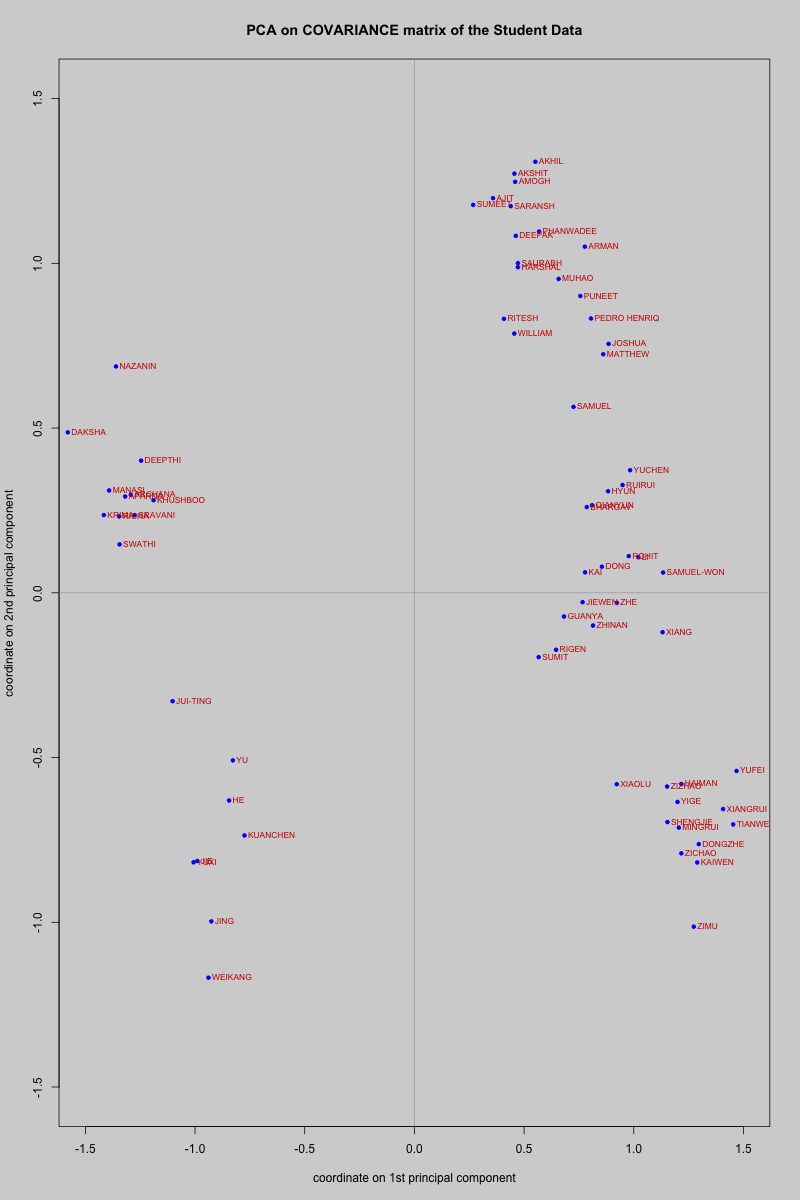

In [98]:
%%R -w 800 -h 1200

DataSVD = svd(cov(Data))  ## COVARIANCE

U = DataSVD$u
V = DataSVD$v
S = diag(DataSVD$d)

ProjData = Data %*% U
u1 = - ProjData[,1] + rnorm(n) * 0.125 # jittered
u2 =   ProjData[,2] + rnorm(n) * 0.125 # jittered

opar = par(bg="lightgray")

plot(u1, u2, pch=20, col="blue", xlim = c(-1.5,1.5),  ylim = c(-1.5,1.5),
     xlab = "coordinate on 1st principal component",
     ylab = "coordinate on 2nd principal component",
     main = "PCA on COVARIANCE matrix of the Student Data" )

text(u1, u2, T[,2], col="red3", pos=4, offset=0.25, cex=0.7 )

abline( h=0, col="darkgray" )  # add x-axis line
abline( v=0, col="darkgray" )  # add y-axis line

par(opar)

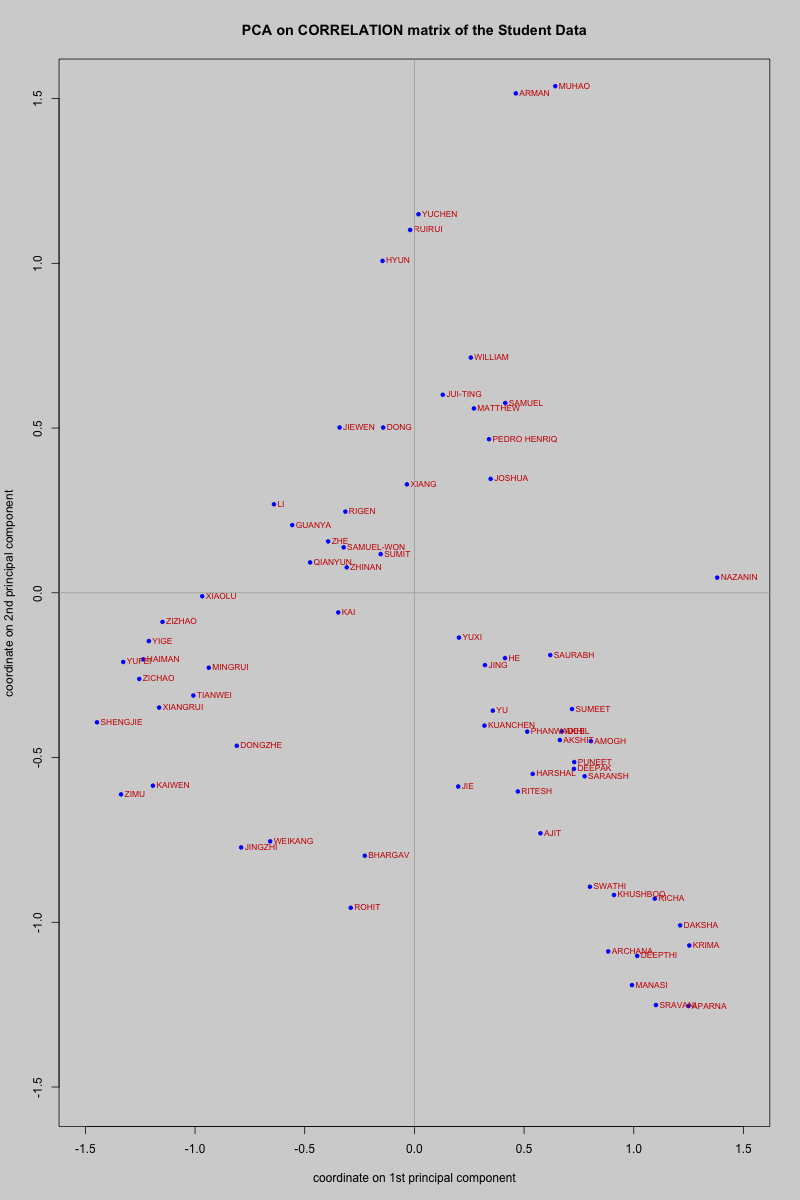

In [99]:
%%R -w 800 -h 1200

DataSVD = svd(cor(Data))  ## CORRELATION

U = DataSVD$u
V = DataSVD$v
S = diag(DataSVD$d)

ProjData = Data %*% U
u1 = - ProjData[,1] + rnorm(n) * 0.125 # jittered
u2 =   ProjData[,2] + rnorm(n) * 0.125 # jittered


opar = par(bg="lightgray")

plot(u1, u2, pch=20, col="blue", xlim = c(-1.5,1.5),  ylim = c(-1.5,1.5),
     xlab = "coordinate on 1st principal component",
     ylab = "coordinate on 2nd principal component",
     main = "PCA on CORRELATION matrix of the Student Data" )

text(u1, u2, T[,2], col="red3", pos=4, offset=0.25, cex=0.7 )

abline( h=0, col="darkgray" )  # add x-axis line
abline( v=0, col="darkgray" )  # add y-axis line

par(opar)